## Chains Basic

In [1]:
%pip install langchain --quiet
%pip install langchain_core --quiet
%pip install langchain_openai --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 987.7/987.7 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 372.0/372.0 kB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.0/135.0 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.7/328.7 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 38.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.6 MB/s eta 0:00:00


Adding the libraries

In [2]:
from langchain.prompts import ChatPromptTemplate
from langchain.schema.output_parser import StrOutputParser
from langchain_core.messages import HumanMessage, AIMessage, SystemMessage
from langchain_openai import ChatOpenAI
import os
from google.colab import userdata
os.environ["OPENAI_API_KEY"] = userdata.get('OPENAI_API_KEY')

Setting up the OPENAI model. Using latest - gpt-4o-mini

In [3]:
model = ChatOpenAI(temperature=0,max_retries=2,model="gpt-4o-mini")

Setting up the Prompt Template

In [4]:
message = [
    ("system","You are a comedian who tells jokes about {topic}."),
    ("human","Tell me {joke_number} jokes.")
]
prompt_template = ChatPromptTemplate.from_messages(message)

Setting up the chain - Using LangChain Expression Language (LCEL)

In [6]:
chain = prompt_template | model | StrOutputParser()

Running the chain

In [7]:
result = chain.invoke({"topic":"cats","joke_number":3})
print(result)

Sure, here are three cat-themed jokes for you:

1. Why did the cat sit on the computer?
   Because it wanted to keep an eye on the mouse!

2. What do you call a pile of cats?
   A meow-tain!

3. Why was the cat so good at video games?
   Because it had nine lives to practice!


## Chains - Under the Hood

In [8]:
from langchain.prompts import ChatPromptTemplate
from langchain.schema.output_parser import StrOutputParser
from langchain_openai import ChatOpenAI
from langchain.schema.runnable import RunnableLambda, RunnableSequence

In [9]:
model = ChatOpenAI(temperature=0,max_retries=2,model="gpt-4o-mini")
message = [
    ("system","You are a comedian who tells jokes about {topic}."),
    ("human","Tell me {joke_number} jokes.")
]
prompt_template = ChatPromptTemplate.from_messages(message)

Create individual Runnables. These are the steps in the chains

In [10]:
format_prompt = RunnableLambda(
    lambda x: prompt_template.format_prompt(**x)
)
invoke_model = RunnableLambda(
    lambda x: model.invoke(x.to_messages())
)
parse_output = RunnableLambda(
    lambda x: x.content
)

Create the Runnable Sequence from the Individual Runnables

In [13]:
chain = RunnableSequence(
    first=format_prompt,middle=[invoke_model],last=parse_output
)

Run the chain

In [15]:
response = chain.invoke({
    "topic":"dogs",
    "joke_number":3
})
print(response)

Sure, here are three dog-themed jokes for you:

1. Why did the dog sit in the shade?
   Because he didn’t want to become a hot dog!

2. What do you call a dog magician?
   A labracadabrador!

3. Why did the dog cross the road?
   To get to the barking lot! 

Hope these made you smile!


## Chains Extended

In [16]:
model = ChatOpenAI(temperature=0,max_retries=2,model="gpt-4o-mini")
message = [
    ("system","You are a comedian who tells jokes about {topic}."),
    ("human","Tell me {joke_number} jokes.")
]
prompt_template = ChatPromptTemplate.from_messages(message)

Setting up the addtional processing using Runnables

In [21]:
uppercase_output = RunnableLambda(
    lambda x: x.upper()
)
count_words = RunnableLambda(
    lambda x: f"Word count: {len(x.split())}\n{x}"
)

Setting up the chain

In [22]:
chain = prompt_template | model | StrOutputParser() | uppercase_output | count_words

result = chain.invoke(
    {
        "topic":"cats",
        "joke_number":3
    }
)
print(result)

Word count: 55
SURE, HERE ARE THREE CAT-THEMED JOKES FOR YOU:

1. WHY DID THE CAT SIT ON THE COMPUTER?
   BECAUSE IT WANTED TO KEEP AN EYE ON THE MOUSE!

2. WHAT DO YOU CALL A PILE OF CATS?
   A MEOW-TAIN!

3. WHY WAS THE CAT SO GOOD AT VIDEO GAMES?
   BECAUSE IT HAD NINE LIVES TO PRACTICE!


## Chains Parallel

Define the prompt template

In [28]:
from langchain.prompts import ChatPromptTemplate
from langchain.schema.output_parser import StrOutputParser
from langchain_openai import ChatOpenAI
from langchain.schema.runnable import RunnableLambda, RunnableSequence, RunnableParallel

In [29]:
model = ChatOpenAI(temperature=0,max_retries=2,model="gpt-4o-mini")
prompt_template = ChatPromptTemplate.from_messages(
    [
      ("system","You are an expert product reviewer."),
      ("human","List the main features of the product {product_name}.")
    ]
)

Define the pros analysis steps

In [42]:
def analyze_pros(features):
  pros_template = ChatPromptTemplate.from_messages(
      [
        ("system","You are an expert product reviewer."),
        ("human","Given these features: {features}, list 5 pros of these features.")
      ]
  )
  return pros_template.format_prompt(features=features)

Define the cons analysis steps

In [43]:
def analyze_cons(features):
  cons_template = ChatPromptTemplate.from_messages(
      [
        ("system","You are an expert product reviewer."),
        ("human","Given these features: {features}, list 5 cons of these features.")
      ]
  )
  return cons_template.format_prompt(features=features)

Combine pros and cons into a final review

In [38]:
def combine_pros_cons(pros,cons):
  return f"Pros:\n{pros}\n\nCons:\n{cons}"

Simplify branches with LCEL

In [39]:
pros_branch_chain = (
    RunnableLambda(lambda x: analyze_pros(x)) | model | StrOutputParser()
)
cons_branch_chain = (
    RunnableLambda(lambda x: analyze_cons(x)) | model | StrOutputParser()
)

Create a combined chain using LCEL

In [44]:
chain = (
    prompt_template
    | model
    | StrOutputParser()
    | RunnableParallel(branches={"pros":pros_branch_chain,
                                 "cons":cons_branch_chain})
    | RunnableLambda(lambda x: combine_pros_cons(
        x["branches"]["pros"],x["branches"]["cons"]))
)

Run the chain

In [45]:
result = chain.invoke(
    {
        "product_name":"MacBook Pro"
    }
)
print(result)

Pros:
Here are five pros of the features associated with the MacBook Pro:

1. **Exceptional Display Quality**: The Retina display with True Tone technology and high resolution provides stunning visuals, making it ideal for creative professionals who require accurate color representation and sharp details. The P3 wide color gamut and ProMotion technology enhance the viewing experience with vibrant colors and smooth scrolling, which is particularly beneficial for graphic design, video editing, and other visually intensive tasks.

2. **Powerful Performance**: The integration of Apple Silicon (M1 Pro, M1 Max, M2 Pro, M2 Max) delivers impressive performance and efficiency. With multi-core CPU configurations, the MacBook Pro can handle demanding applications and multitasking with ease, making it a top choice for professionals in fields such as software development, video production, and 3D rendering.

3. **Long Battery Life**: With battery life ranging from 17 to 21 hours, the MacBook Pro al

## Chains Branching

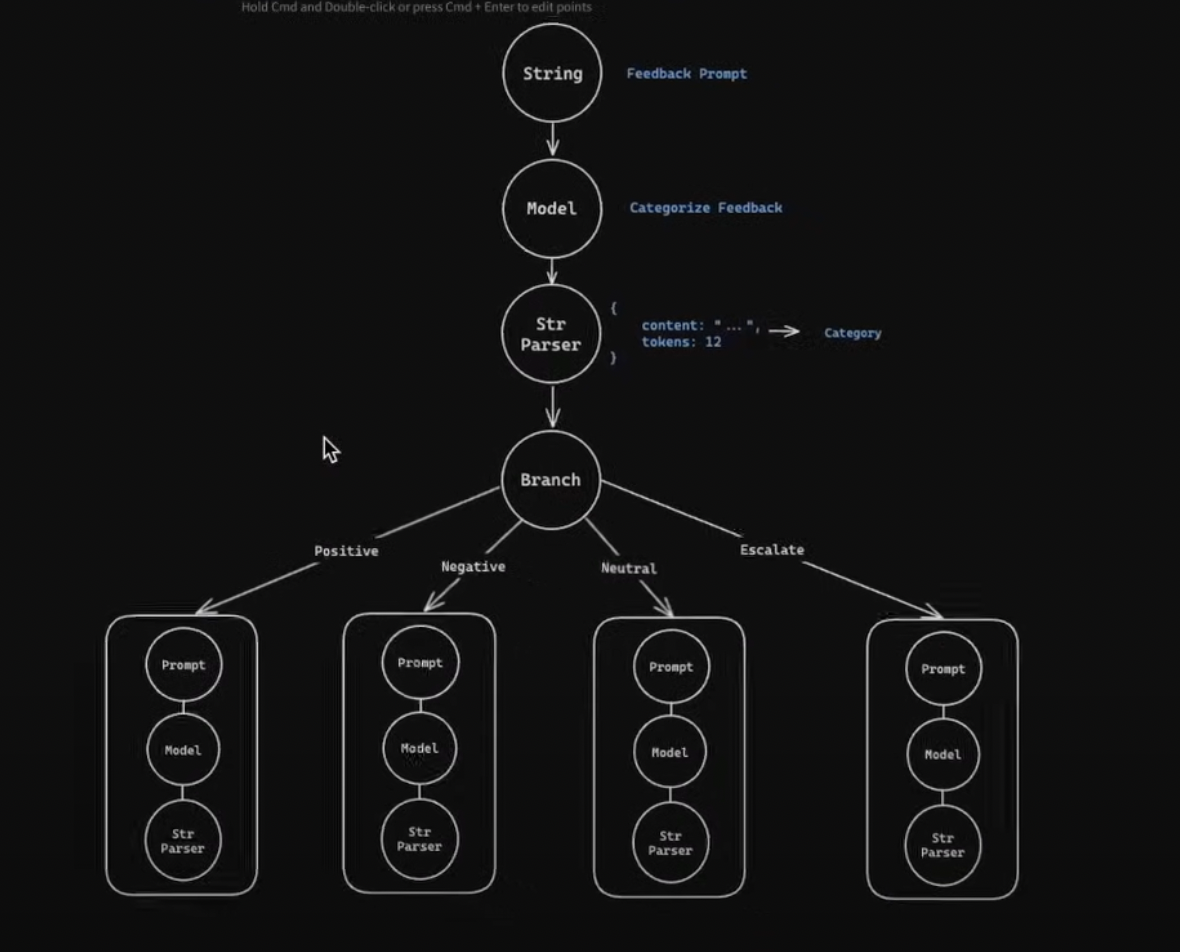

In [46]:
from langchain.prompts import ChatPromptTemplate
from langchain.schema.output_parser import StrOutputParser
from langchain_openai import ChatOpenAI
from langchain.schema.runnable import RunnableLambda, RunnableSequence, RunnableParallel, RunnableBranch

In [47]:
model = ChatOpenAI(temperature=0,max_retries=2,model="gpt-4o-mini")

prompt templates for the different feedback types

In [48]:
positive_feedback_template = ChatPromptTemplate.from_messages(
    [
      ("system","You are a helpful assistant."),
      ("human","Generate a thank you note for this positive feedback: {feedback}.")
    ]
)
negative_feedback_template = ChatPromptTemplate.from_messages(
    [
      ("system","You are a helpful assistant."),
      ("human","Generate a response addressing this negative feedback: {feedback}.")
    ]
)
neutral_feedback_template = ChatPromptTemplate.from_messages(
    [
      ("system","You are a helpful assistant."),
      ("human","Generate a request for more details about this neutral feedback: {feedback}.")
    ]
)
escalate_feedback_template = ChatPromptTemplate.from_messages(
    [
      ("system","You are a helpful assistant."),
      ("human","Generate a message to escalate this feedback to a human agent: {feedback}.")
    ]
)


In [49]:
#classification prompt
classification_template = ChatPromptTemplate.from_messages(
    [
      ("system","You are a helpful assistant."),
      ("human","Classify the sentiment of this feedback as positive, negative, neutral, escalate: {feedback}.")
    ]
)

Define the Runnable Branches for handling feedback

In [50]:
branches = RunnableBranch(
    (
        lambda x: "positive"in x,
        positive_feedback_template | model | StrOutputParser()
    ),
    (
        lambda x: "negative"in x,
        negative_feedback_template | model | StrOutputParser()
    ),
    (
        lambda x: "neutral"in x,
        neutral_feedback_template | model | StrOutputParser()
    ),
    escalate_feedback_template | model | StrOutputParser()
)

Create the Classification Chain

In [51]:
classification_chain = classification_template | model | StrOutputParser()

Combining Classification and response generation into 1 chain

In [52]:
chain = classification_chain | branches

In [53]:
review = "The product is terrible. It broke after just one use and the quality is very poor."
result = chain.invoke({"feedback": review})

# Output the result
print(result)

Subject: Thank You for Your Feedback

Dear [Name],

Thank you for taking the time to share your thoughts with us. I’m sorry to hear that your experience did not meet your expectations. We value all feedback, as it helps us improve our services and better serve our customers.

I would love to understand more about your concerns and how we can make things right. If you could provide more details about your experience, it would be greatly appreciated. Your satisfaction is important to us, and we are committed to addressing any issues you may have encountered.

Thank you again for your feedback. I look forward to hearing from you soon.

Best regards,

[Your Name]  
[Your Position]  
[Your Company]  
[Your Contact Information]  


In [ ]:
# Other example review
# Good review - "The product is excellent. I really enjoyed using it and found it very helpful."
# Bad review - "The product is terrible. It broke after just one use and the quality is very poor."
# Neutral review - "The product is okay. It works as expected but nothing exceptional."
# Default - "I'm not sure about the product yet. Can you tell me more about its features and benefits?"
